## Iowa Liquor Sale Aanalysis - Weekly Aanalysis

In [2]:
import numpy as np
import pandas as pd

import os
import tarfile

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

np.random.seed(123)

In [3]:
import csv
TextFileReader = pd.read_csv('Condensed_Iowa_Liquor_Sales.csv',chunksize=100000, engine='python')

dfList = []
for df in TextFileReader:
    dfList.append(df)

condensed = pd.concat(dfList,sort=False)
condensed

,Date,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),qtr_date
0,2014-12-26,2648,50265,77,1081312,380,83363,12,750,5.15,7.73,3,23.19,2,2014-10-01
1,2015-06-16,3625,50021,77,1031080,260,37418,6,1750,8.50,12.75,12,153.00,21,2015-04-01
2,2013-07-29,2629,51503,78,1051110,434,55087,12,1000,6.52,9.79,12,117.48,12,2013-07-01
3,2013-01-02,3735,52577,10,1032080,35,34422,6,1000,21.77,32.66,6,195.96,6,2013-01-01
4,2014-07-08,2619,50266,77,1081015,130,64135,12,375,7.50,11.25,6,67.50,2,2014-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259889,2012-03-29,2527,50315,77,1031080,380,37346,12,750,3.48,5.23,12,62.76,9,2012-01-01
16259890,2013-03-14,4103,50010,85,1041100,434,31656,12,750,3.39,5.09,12,61.08,9,2013-01-01
16259891,2012-12-18,2573,52761,70,1081600,421,64867,12,1000,11.33,17.00,24,408.00,24,2012-10-01
16259892,2013-05-29,2191,52632,56,1062200,35,43126,12,750,7.53,11.30,2,22.60,1,2013-04-01


In [4]:
condensed.dtypes

Date                     object
Store Number              int64
Zip Code                 object
County Number             int64
Category                  int64
Vendor Number             int64
Item Number               int64
Pack                      int64
Bottle Volume (ml)        int64
State Bottle Cost       float64
State Bottle Retail     float64
Bottles Sold              int64
Sale (Dollars)          float64
Volume Sold (Liters)      int64
qtr_date                 object
dtype: object

In [5]:
condensed['Date'] = pd.to_datetime(condensed['Date'])
condensed['qtr_date'] = pd.to_datetime(condensed['qtr_date'])
condensed = condensed.astype({'Zip Code': 'str'})
condensed['week of (Sunday)'] = condensed['Date'] - pd.offsets.Week(weekday=6)
condensed['week of (Sunday)'] = pd.to_datetime(condensed['week of (Sunday)'])
condensed['week'] = condensed['week of (Sunday)'].dt.week
condensed['Year'] = condensed['week of (Sunday)'].dt.year
condensed.dtypes

Date                    datetime64[ns]
Store Number                     int64
Zip Code                        object
County Number                    int64
Category                         int64
Vendor Number                    int64
Item Number                      int64
Pack                             int64
Bottle Volume (ml)               int64
State Bottle Cost              float64
State Bottle Retail            float64
Bottles Sold                     int64
Sale (Dollars)                 float64
Volume Sold (Liters)             int64
qtr_date                datetime64[ns]
week of (Sunday)        datetime64[ns]
week                             int64
Year                             int64
dtype: object

In [6]:
condensed

,Date,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),qtr_date,week of (Sunday),week,Year
0,2014-12-26,2648,50265,77,1081312,380,83363,12,750,5.15,7.73,3,23.19,2,2014-10-01,2014-12-21,51,2014
1,2015-06-16,3625,50021,77,1031080,260,37418,6,1750,8.50,12.75,12,153.00,21,2015-04-01,2015-06-14,24,2015
2,2013-07-29,2629,51503,78,1051110,434,55087,12,1000,6.52,9.79,12,117.48,12,2013-07-01,2013-07-28,30,2013
3,2013-01-02,3735,52577,10,1032080,35,34422,6,1000,21.77,32.66,6,195.96,6,2013-01-01,2012-12-30,52,2012
4,2014-07-08,2619,50266,77,1081015,130,64135,12,375,7.50,11.25,6,67.50,2,2014-07-01,2014-07-06,27,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259889,2012-03-29,2527,50315,77,1031080,380,37346,12,750,3.48,5.23,12,62.76,9,2012-01-01,2012-03-25,12,2012
16259890,2013-03-14,4103,50010,85,1041100,434,31656,12,750,3.39,5.09,12,61.08,9,2013-01-01,2013-03-10,10,2013
16259891,2012-12-18,2573,52761,70,1081600,421,64867,12,1000,11.33,17.00,24,408.00,24,2012-10-01,2012-12-16,50,2012
16259892,2013-05-29,2191,52632,56,1062200,35,43126,12,750,7.53,11.30,2,22.60,1,2013-04-01,2013-05-26,21,2013


In [7]:
#Weekly Aggregate Sales

weekly_aggregate_sales=condensed.groupby(['week of (Sunday)'],as_index=False)['Sale (Dollars)'].sum()
weekly_aggregate_sales['week'] = weekly_aggregate_sales['week of (Sunday)'].dt.week
weekly_aggregate_sales['Year'] = weekly_aggregate_sales['week of (Sunday)'].dt.year

weekly_aggregate_sales

,week of (Sunday),Sale (Dollars),week,Year
0,2012-01-01,2571049.89,52,2012
1,2012-01-08,3240400.64,1,2012
2,2012-01-15,3442680.63,2,2012
3,2012-01-22,3448626.86,3,2012
4,2012-01-29,3816394.88,4,2012
...,...,...,...,...
421,2020-01-26,5124034.33,4,2020
422,2020-02-02,6114246.02,5,2020
423,2020-02-09,5502556.44,6,2020
424,2020-02-16,6052007.49,7,2020


In [8]:
#Weekly Aggregate Sales by County

weekly_aggregate_sales_by_county=condensed.groupby(['week of (Sunday)','County Number'],as_index=False)['Sale (Dollars)'].sum()
weekly_aggregate_sales_by_county['week'] = weekly_aggregate_sales_by_county['week of (Sunday)'].dt.week
weekly_aggregate_sales_by_county['Year'] = weekly_aggregate_sales_by_county['week of (Sunday)'].dt.year

data = weekly_aggregate_sales_by_county

one_hot = pd.get_dummies(data['County Number'])
data = data.drop('County Number', axis=1)
data = data.join(one_hot)

weekly_aggregate_sales_by_county = data
weekly_aggregate_sales_by_county

,week of (Sunday),Sale (Dollars),week,Year,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,2012-01-01,6065.57,52,2012,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-01,1491.20,52,2012,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-01,11837.46,52,2012,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-01,2909.50,52,2012,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-01,10646.53,52,2012,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40685,2020-02-23,18750.76,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40686,2020-02-23,44209.38,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
40687,2020-02-23,277107.61,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40688,2020-02-23,3909.89,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
#Weekly Aggregate Sales by County and Vendor

weekly_aggregate_sales_by_county_and_vendor=condensed.groupby(['week of (Sunday)','County Number', 'Vendor Number'],as_index=False)['Sale (Dollars)'].sum()
weekly_aggregate_sales_by_county_and_vendor['week'] = weekly_aggregate_sales_by_county_and_vendor['week of (Sunday)'].dt.week
weekly_aggregate_sales_by_county_and_vendor['Year'] = weekly_aggregate_sales_by_county_and_vendor['week of (Sunday)'].dt.year

data = weekly_aggregate_sales_by_county_and_vendor

one_hot1 = pd.get_dummies(data['County Number'],prefix='county_')
one_hot2 = pd.get_dummies(data['Vendor Number'],prefix='vendor_')
data = data.drop('County Number', axis=1)
data = data.drop('Vendor Number', axis=1)
data = data.join(one_hot1).join(one_hot2)

weekly_aggregate_sales_by_county_and_vendor = data
weekly_aggregate_sales_by_county_and_vendor

,week of (Sunday),Sale (Dollars),week,Year,county__1,county__2,county__3,county__4,county__5,county__6,...,vendor__624,vendor__626,vendor__803,vendor__885,vendor__962,vendor__969,vendor__971,vendor__977,vendor__978,vendor__987
0,2012-01-01,267.60,52,2012,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-01,100.32,52,2012,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-01,914.70,52,2012,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-01,237.58,52,2012,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-01,835.86,52,2012,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068160,2020-02-23,522.00,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1068161,2020-02-23,1987.71,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1068162,2020-02-23,1071.41,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1068163,2020-02-23,90.00,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Weekly Aggregate Sales by Item

weekly_aggregate_sales_by_item=condensed.groupby(['week of (Sunday)','Item Number'],as_index=False)['Sale (Dollars)'].sum()
weekly_aggregate_sales_by_item['week'] = weekly_aggregate_sales_by_item['week of (Sunday)'].dt.week
weekly_aggregate_sales_by_item['Year'] = weekly_aggregate_sales_by_item['week of (Sunday)'].dt.year

data = weekly_aggregate_sales_by_item

one_hot = pd.get_dummies(data['Item Number'])
data = data.drop('Item Number', axis=1)
data = data.join(one_hot)

weekly_aggregate_sales_by_item = data
weekly_aggregate_sales_by_item

,week of (Sunday),Sale (Dollars),week,Year,102,107,114,115,122,124,...,997095,997101,997872,997878,998546,998606,999280,999292,999440,999449
0,2012-01-01,19.51,52,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-01,109.71,52,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-01,190.50,52,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-01,26.97,52,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-01,150.00,52,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750670,2020-02-23,84.12,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750671,2020-02-23,127.48,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750672,2020-02-23,463.80,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750673,2020-02-23,252.00,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Weekly Aggregate Sales by Vendor

weekly_aggregate_sales_by_vendor=condensed.groupby(['week of (Sunday)','Vendor Number'],as_index=False)['Sale (Dollars)'].sum()
weekly_aggregate_sales_by_vendor['week'] = weekly_aggregate_sales_by_vendor['week of (Sunday)'].dt.week
weekly_aggregate_sales_by_vendor['Year'] = weekly_aggregate_sales_by_vendor['week of (Sunday)'].dt.year

data = weekly_aggregate_sales_by_vendor

one_hot = pd.get_dummies(data['Vendor Number'])
data = data.drop('Vendor Number', axis=1)
data = data.join(one_hot)

weekly_aggregate_sales_by_vendor = data
weekly_aggregate_sales_by_vendor

,week of (Sunday),Sale (Dollars),week,Year,10,14,27,33,35,51,...,624,626,803,885,962,969,971,977,978,987
0,2012-01-01,149309.60,52,2012,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-01,94683.64,52,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-01,268080.55,52,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-01,171464.51,52,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-01,249.65,52,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35503,2020-02-23,765.00,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35504,2020-02-23,49988.67,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35505,2020-02-23,37639.70,8,2020,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
35506,2020-02-23,97.50,8,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc
from sklearn import preprocessing

import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE =  985491.5929428723


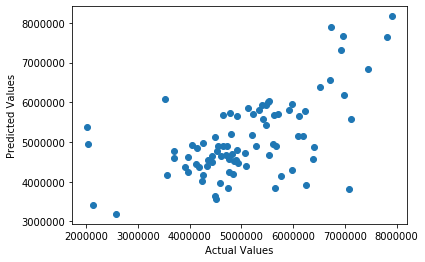

In [21]:
#Applying Random Forest Regression to Weekly Aggregate Sales

train_set, test_set = train_test_split(weekly_aggregate_sales, test_size=0.2, random_state=42)

target = 'Sale (Dollars)'
features = list(train_set.columns)
features = [f for f in features if f != target]
features = [f for f in features if f != 'week of (Sunday)']

# Train set
X_tr = preprocessing.scale(train_set[features])
y_tr = train_set[[target]]

# Test set
X_te = preprocessing.scale(test_set[features])
y_te = test_set[[target]]

rnd_clf = RandomForestRegressor(n_estimators=100)
rnd_clf.fit(X_tr, y_tr)

y_te_est = rnd_clf.predict(X_te)
final_mse = mean_squared_error(y_te, y_te_est)
final_rmse = np.sqrt(final_mse)

y_te_weekly_aggregate_sales = y_te
y_te_weekly_aggregate_sales['week of (Sunday)'] = weekly_aggregate_sales['week of (Sunday)']
y_te_est_weekly_aggregate_sales = y_te_est
y_te_weekly_aggregate_sales['Prediction'] = y_te_est_weekly_aggregate_sales

print("RMSE = ",final_rmse)

plt.scatter(x=y_te['Sale (Dollars)'], y=y_te_est)
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values') 
plt.show()

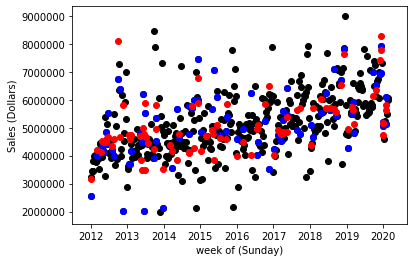

In [14]:
#Plotting the original data (black), the test data (blue), and the predicted data (red) for statewide weekly aggregate sales

plt.scatter(x=weekly_aggregate_sales['week of (Sunday)'], y=weekly_aggregate_sales['Sale (Dollars)'],color='k')
plt.scatter(x=y_te_weekly_aggregate_sales['week of (Sunday)'], y=y_te_weekly_aggregate_sales['Sale (Dollars)'],color='b')
plt.scatter(x=y_te_weekly_aggregate_sales['week of (Sunday)'], y=y_te_weekly_aggregate_sales['Prediction'],color='r')
plt.xlabel('week of (Sunday)')
plt.ylabel('Sales (Dollars)')
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE =  34977.236474304416


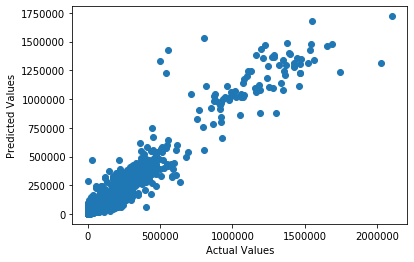

In [15]:
#Applying Random Forest Regression to Weekly Aggregate Sales by County

train_set, test_set = train_test_split(weekly_aggregate_sales_by_county, test_size=0.2, random_state=42)

target = 'Sale (Dollars)'
features = list(train_set.columns)
features = [f for f in features if f != target]
features = [f for f in features if f != 'week of (Sunday)']

# Train set
X_tr = preprocessing.scale(train_set[features])
y_tr = train_set[[target]]

# Test set
X_te = preprocessing.scale(test_set[features])
y_te = test_set[[target]]

rnd_clf = RandomForestRegressor(n_estimators=100)
rnd_clf.fit(X_tr, y_tr)

y_te_est = rnd_clf.predict(X_te)
final_mse = mean_squared_error(y_te, y_te_est)
final_rmse = np.sqrt(final_mse)

print("RMSE = ",final_rmse)

plt.scatter(x=y_te, y=y_te_est)
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values') 
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE =  3344.5940509300144


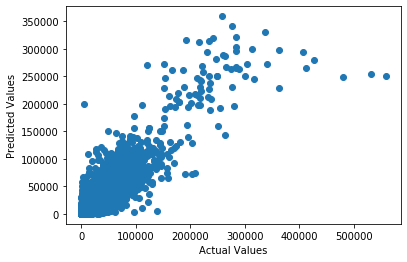

In [16]:
#Applying Random Forest Regression to Weekly Aggregate Sales by County and Vendor

train_set, test_set = train_test_split(weekly_aggregate_sales_by_county_and_vendor, test_size=0.2, random_state=42)

target = 'Sale (Dollars)'
features = list(train_set.columns)
features = [f for f in features if f != target]
features = [f for f in features if f != 'week of (Sunday)']

# Train set
X_tr = preprocessing.scale(train_set[features])
y_tr = train_set[[target]]

# Test set
X_te = preprocessing.scale(test_set[features])
y_te = test_set[[target]]

rnd_clf = RandomForestRegressor(n_estimators=10)
rnd_clf.fit(X_tr, y_tr)

y_te_est = rnd_clf.predict(X_te)
final_mse = mean_squared_error(y_te, y_te_est)
final_rmse = np.sqrt(final_mse)

print("RMSE = ",final_rmse)

plt.scatter(x=y_te, y=y_te_est)
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values') 
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE =  36989.159074428804


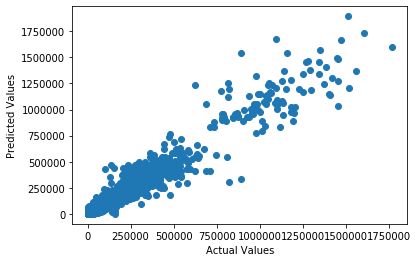

In [19]:
#Applying Random Forest Regression to Weekly Aggregate Sales by Vendor

train_set, test_set = train_test_split(weekly_aggregate_sales_by_vendor, test_size=0.2, random_state=42)

target = 'Sale (Dollars)'
features = list(train_set.columns)
features = [f for f in features if f != target]
features = [f for f in features if f != 'week of (Sunday)']

# Train set
X_tr = preprocessing.scale(train_set[features])
y_tr = train_set[[target]]

# Test set
X_te = preprocessing.scale(test_set[features])
y_te = test_set[[target]]

rnd_clf = RandomForestRegressor(n_estimators=100)
rnd_clf.fit(X_tr, y_tr)

y_te_est = rnd_clf.predict(X_te)
final_mse = mean_squared_error(y_te, y_te_est)
final_rmse = np.sqrt(final_mse)

print("RMSE = ",final_rmse)

plt.scatter(x=y_te, y=y_te_est)
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values') 
plt.show()